제목
=================

소제목
--------------------------------
# 제목

##부제목
### 부부제목

73d6409e91ab04b21c6fb98f6d5f46965694b5d9e27ba742ee910054e6ef5298

In [99]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)


In [100]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.dpi'] = 100
import gdown
import pandas as pd

In [ ]:
import requests

url="http://data4library.kr/api/loanItemSrch?authKey=73d6409e91ab04b21c6fb98f6d5f46965694b5d9e27ba742ee910054e6ef5298&pageSize=100000&format='JSON'"
r=requests.get(url)
data=r.json()
print(data)

In [ ]:
books=[]
for d in data['response']['docs']:
  books.append(d['doc'])
print(books)

In [ ]:
import pandas as pd

books_df=pd.DataFrame(books)
print(books_df)

In [ ]:
books=books_df[['no','ranking','bookname','authors','publisher','publication_year','isbn13','loan_count']]
books

In [ ]:

books.replace({np.nan: None})

books=books[['publisher','loan_count']]
books = books.astype({'loan_count':int})

books.groupby(by=['publisher'])



In [116]:
books_count=books.groupby('publisher').sum()

books_count=books_count.sort_values(['loan_count'], ascending=False)
books_top10=books_count[:9]

In [ ]:
books_top10.reset_index(drop=False,inplace=True)

books_top10

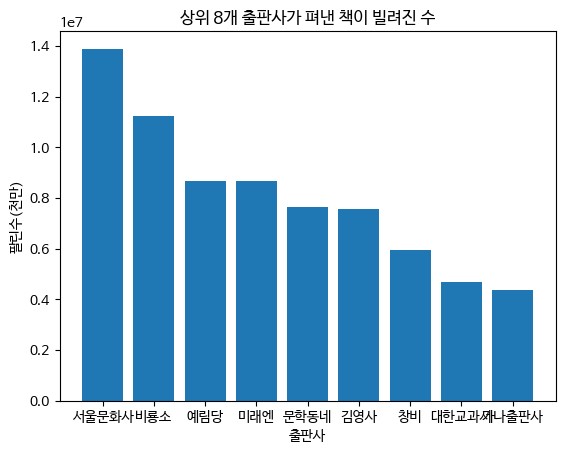

In [126]:
plt.bar(books_top10['publisher'], books_top10['loan_count'])
plt.title('상위 8개 출판사가 펴낸 책이 빌려진 수')
plt.xlabel('출판사')
plt.ylabel('팔린수(천만)')
plt.show()